# Predict survival on the Titanic
In this Lab, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy

### Dataset
The dataset contains 891 observations of 12 variables:
* **PassengerId**: Unique ID for each passenger
* **Survived**: Survival (0 = No; 1 = Yes)
* **Pclass**: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
* **Name**: Name
* **Sex**: Sex
* **Age**: Age
* **Sibsp**: Number of Siblings/Spouses Aboard
* **Parch**: Number of Parents/Children Aboard
* **Ticket**: Ticket Number
* **Fare**: Passenger Fare
* **Cabin**: Cabin
* **Embarked** Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [3]:
# imports
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

In [4]:
titanic = pd.read_csv("titanic.csv" )
titanic.drop('Cabin', axis=1, inplace=True) # Drop this column because it contains a lot of Nan values
titanic["Age"].fillna(titanic["Age"].median(),inplace=True)
titanic["Embarked"].fillna("S", inplace = True)
print ('survival rate =', titanic.Survived.mean())

survival rate = 0.3838383838383838


## Model training

In [5]:
# Some of the columns don't have predictive power, so let's specify which ones are included for prediction
predictors = ["Pclass", "Sex", "Age", 'SibSp' ,'Parch', "Fare", "Embarked"]  
# We need now to convert text columns in predictors to numerical ones
for col in predictors: # Loop through all columns in predictors
    if titanic[col].dtype == 'object':  # check if column's type is object (text)
        titanic[col] = pd.Categorical(titanic[col]).codes  # convert text to numerical

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


In [6]:
# Split the data into a training set and a testing set
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(titanic[predictors], titanic['Survived'], test_size=0.3, random_state=1)

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=1)
clf.fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
print ('train accuracy =', clf.score(X_train, y_train))

from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, titanic[predictors], titanic["Survived"], scoring='accuracy', cv=10)
print('cross validation accuracy =', scores.mean())

train accuracy = 0.8073836276083467
cross validation accuracy = 0.7957428214731586


 # Decision Trees

Let's start with one single tree

In [8]:
# import from: http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier(random_state=1)
clf_dt.fit(X_train,y_train)

print ('train accuracy =', clf_dt.score(X_train,y_train))
print ('test accuracy =', clf_dt.score(X_test,y_test))

train accuracy = 0.9887640449438202
test accuracy = 0.7574626865671642


Predictions are obtained in the same way of Logistic Regression

In [9]:
y_pred = clf_dt.predict(X_test)
print (y_pred)

[1 0 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1
 0 1 0 0 0 1 0 1 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1
 1 0 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 1 1 0 1 0 0 0 1 0
 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1
 0 0 1 0 1 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0
 1 1 0 0 1 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 0
 0 1 0 1 0 0 0 0 1]


In [10]:
y_prob = clf_dt.predict_proba(X_test)
print (y_prob)

[[0.   1.  ]
 [1.   0.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.   1.  ]
 [1.   0.  ]
 [0.   1.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.25 0.75]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.5  0.5 ]
 [1.   0.  ]
 [0.   1.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.   1.  ]
 [0.   1.  ]
 [1.   0.  ]
 [0.   1.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.   1.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.   1.  ]
 [1.   0.  ]
 [0.   1.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.   1.  ]
 [1.   0.  ]
 [0.   1.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.8  0.2 ]
 [1.   0.  ]
 [1.   0.  ]
 [0.   1.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.   1.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.   1.  ]
 [1.   0.  ]
 [0.   1.  ]

Let's play around with some of the decision tree's parameters

In [12]:
# check the sklearn documentation and change the folowing parametrs: max_depth, min_samples_split, min_samples_leaf 
clf_dt = DecisionTreeClassifier(random_state=1, max_depth = 3,min_samples_split = 5 ,min_samples_leaf = 4 )
# your code here
clf_dt.fit(X_train,y_train)
print ('train accuracy =', clf_dt.score(X_train,y_train))

# Cross validation
scores_dt = cross_val_score(clf_dt, titanic[predictors], titanic["Survived"], scoring='accuracy', cv=10)
print('cross validation accuracy =', scores_dt.mean())

train accuracy = 0.8571428571428571
cross validation accuracy = 0.8170536828963794


### Plot the decision tree
Set the max_depth parameter in the previous classifier to 3 and leave all the other ones to default values.

In [15]:
from sklearn import tree
clf_dt = DecisionTreeClassifier(random_state=1, max_depth = 3)
clf_dt.fit(X_train,y_train)
tree.export_graphviz(clf_dt, out_file='tree.dot')
# As a reminder, these are the predicting features in order
print (dict(zip(range(len(predictors)),predictors)))

{0: 'Pclass', 1: 'Sex', 2: 'Age', 3: 'SibSp', 4: 'Parch', 5: 'Fare', 6: 'Embarked'}


The image should look like the following

In [16]:
from IPython.display import Image
Image("DT.png")

Predict the survival of a female, Pclass 1 or 2, above age 2.5

In [58]:
passenger1=np.array([1,0,12,0,0,0,0]).reshape(1, -1)
print ('proba =', clf_dt.predict_proba(passenger1))
print ('class =', clf_dt.predict(passenger1))

proba = [[0.04347826 0.95652174]]
class = [1]


Predict the survival of a male, above age 11.5, Pclass 2 or 3

In [59]:
passenger2=np.array([[2,1,12,0,0,0,0]]).reshape(1, -1)
print ('proba =', clf_dt.predict_proba(passenger2))
print ('class =', clf_dt.predict(passenger2))

proba = [[0.91089109 0.08910891]]
class = [0]


By looking at this decision tree, you can get a sense the relative importance between features. let's see which are the most important ones using the attribute: **feature\_importances_**

In [60]:
feat_imp = pd.DataFrame(clf_dt.feature_importances_, predictors, columns=['Importance'])
feat_imp.sort_values('Importance', ascending=False)

,Importance
Sex,0.611786
Pclass,0.189001
Age,0.084796
SibSp,0.064193
Embarked,0.050225
Parch,0.000000
Fare,0.000000


As expected, **Parch** and **Fare** are the least important ones because they were not used for splitting, while **Sex** is the most important one since it was used first for splitting. 

# Random Forest
A   [Random Forest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier from sklearn.ensemble import RandomForestClassifier) is an ensemble of [decision trees](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)

In [61]:
# import from: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(random_state=1)  # by default, 10 trees are used
# your code here
clf_rf.fit(X_train,y_train)
print ('train accuracy =', clf_rf.score(X_train,y_train))

# Cross validation
scores_rf = cross_val_score(clf_rf, titanic[predictors], titanic["Survived"], scoring='accuracy', cv=10)
print('cross validation accuracy =', scores_rf.mean())

train accuracy = 0.9887640449438202
cross validation accuracy = 0.8003245942571784


In the same way, you can print the feature importance of all the trees

In [62]:
feat_imp = pd.DataFrame(clf_rf.feature_importances_, predictors, columns=['Importance'])
feat_imp.sort_values('Importance', ascending=False)

,Importance
Fare,0.260215
Sex,0.260039
Age,0.252220
Pclass,0.088561
SibSp,0.053251
Parch,0.045476
Embarked,0.040238


Random forest, like decision trees have a lot of parameters to tune. Usually, performance does not change linearly with parameters. Let's take as an example, the accuracy as a function of number of trees (**n_estimators**)

1 , 0.6902985074626866
2 , 0.7201492537313433
3 , 0.75
4 , 0.7649253731343284
5 , 0.7723880597014925
6 , 0.7947761194029851
7 , 0.7873134328358209
8 , 0.7910447761194029
9 , 0.7798507462686567
10 , 0.7798507462686567
11 , 0.7761194029850746
12 , 0.7686567164179104
13 , 0.7649253731343284
14 , 0.7686567164179104
15 , 0.7686567164179104
16 , 0.7873134328358209
17 , 0.7835820895522388
18 , 0.7798507462686567
19 , 0.7947761194029851
20 , 0.8022388059701493
21 , 0.8022388059701493
22 , 0.7910447761194029
23 , 0.7910447761194029
24 , 0.7910447761194029
25 , 0.7835820895522388
26 , 0.7798507462686567
27 , 0.7761194029850746
28 , 0.7835820895522388
29 , 0.7686567164179104
30 , 0.7835820895522388
31 , 0.7723880597014925
32 , 0.7686567164179104
33 , 0.7649253731343284
34 , 0.7649253731343284
35 , 0.7649253731343284
36 , 0.7686567164179104
37 , 0.7611940298507462
38 , 0.7686567164179104
39 , 0.7611940298507462
40 , 0.7686567164179104
41 , 0.7611940298507462
42 , 0.7686567164179104
43 , 0.76492537

Text(0.5, 0, 'Number of Trees')

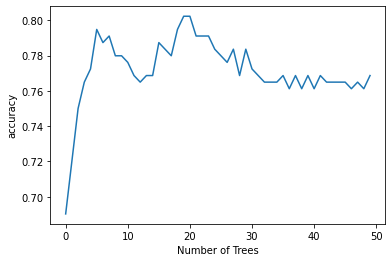

In [64]:
%matplotlib inline
import matplotlib.pyplot as plt

trees=range(50)
accuracy=np.zeros(50)
for idx in range(len(trees)):
    clf_rf=RandomForestClassifier(random_state=1, n_estimators=idx + 1)
    clf_rf.fit(X_train,y_train)
    accuracy[idx]=clf_rf.score(X_test, y_test)  
    print(f"{idx+1} , {accuracy[idx]}")

plt.plot(trees, accuracy)
plt.ylabel('accuracy')
plt.xlabel('Number of Trees')

In the following, try to tune manually the following parameters: **min_samples_leaf, min_samples_split, max_depth, n_estimators** in order to increase cross validation accuracy.

In [81]:
clf_rf = RandomForestClassifier(random_state=1, n_estimators = 20, min_samples_leaf= 3, min_samples_split= 8)
clf_rf.fit(X_train, y_train)
print ('train accuracy =', clf_rf.score(X_train, y_train))

# Cross validation
scores_rf = cross_val_score(clf_rf, titanic[predictors], titanic["Survived"], scoring='accuracy', cv=5)
print('cross validation accuracy =', scores_rf.mean())

train accuracy = 0.8956661316211878
cross validation accuracy = 0.821568012051974


This might be a difficult job to do manually. In other way is to search automatically the best combination of different ranges for these parameters. This is done using **Grid Search**

# Grid Search

In [68]:
# Documentation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV
from sklearn.model_selection import GridSearchCV
params = {'min_samples_leaf':list(range(1,5)),'min_samples_split':list(range(2,10,2)),
          'n_estimators':list(range(10,50,10))}
clf_rf2=RandomForestClassifier(random_state=1)
clf_gs=GridSearchCV(clf_rf2, params, scoring = 'accuracy',cv=5)
clf_gs.fit(titanic[predictors], titanic["Survived"])

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [10, 20, 30, 40]},
             scoring='accuracy')

Print the best score

In [78]:
clf_gs.best_score_

0.8327976900382902

Print the best parameters

In [79]:
clf_gs.best_params_

{'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 30}

Let's use these best parameters and check whether they achieve really the above cv accuracy

In [82]:
clf_rf3 = RandomForestClassifier(random_state=1, n_estimators = 20, min_samples_leaf= 3, min_samples_split= 8) 
clf_rf3.fit(X_train, y_train)
print ('train accuracy =', clf_rf3.score(X_train, y_train))

scores_rf3 = cross_val_score(clf_rf3, titanic[predictors], titanic["Survived"], scoring='accuracy', cv=5)
print('cross validation accuracy =',scores_rf3.mean())

train accuracy = 0.8956661316211878
cross validation accuracy = 0.821568012051974


As you can see, grid search allows you to find the best model parameters to improve your accuracy. Now, we can see the most important features of this last classifier

In [83]:
feat_imp = pd.DataFrame(clf_rf3.feature_importances_, predictors, columns=['Importance'])
feat_imp.sort_values('Importance', ascending=False)

,Importance
Sex,0.359726
Fare,0.216908
Age,0.169628
Pclass,0.114639
SibSp,0.057168
Parch,0.043194
Embarked,0.038738
